# 프로젝트_Vocabulary Size를 변경해서 시도해보기

## 목차
- 1. 프로젝트 개요
- 2. 필요 라이브러리 불러오기
- 3. 직접 단어 개수 설정하기
    - 3-1. 데이터 확인하기
    - 3-2. 데이터 복원하기
    - 3-3. 벡터화
    - 3-4. 다양한 분류 모델 사용해보기
        - (1) 나이브 베이즈 분류기
        - (2) 컴플리먼트 나이브 베이즈 분류기
        - (3) F1-Score
        - (4) Confusion Matrix
        - (5) 로지스틱 회귀(Logistic Regerssion)
        - (6) 선형 서포트 벡터 머신
        - (7) 결정 트리(Decision Tree)
        - (8) 랜덤 포레스트(Random Forest)
        - (9) 그래디언트 부스팅 트리(GradientBoostingClassifier)
        - (10) 보팅(Voting)
        - (11) RNN
- 4. 모든 단어 사용하기
    - 4-1. 데이터 확인하기
    - 4-2. 데이터 복원하기
    - 4-3. 벡터화
    - 4-4. 다양한 분류 모델 사용해보기
        - (1) 나이브 베이즈 분류기
        - (2) 컴플리먼트 나이브 베이즈 분류기
        - (3) F1-Score
        - (4) Confusion Matrix
        - (5) 로지스틱 회귀(Logistic Regerssion)
        - (6) 선형 서포트 벡터 머신
        - (7) 결정 트리(Decision Tree)
        - (8) 랜덤 포레스트(Random Forest)
        - (9) 그래디언트 부스팅 트리(GradientBoostingClassifier)
        - (10) 보팅(Voting)
        - (11) RNN
- 5. 빈도수 상위 5,000개의 단어만 사용
    - 5-1. 데이터 확인하기
    - 5-2. 데이터 복원하기
    - 5-3. 벡터화
    - 5-4. 다양한 분류 모델 사용해보기
        - (1) 나이브 베이즈 분류기
        - (2) 컴플리먼트 나이브 베이즈 분류기
        - (3) F1-Score
        - (4) Confusion Matrix
        - (5) 로지스틱 회귀(Logistic Regerssion)
        - (6) 선형 서포트 벡터 머신
        - (7) 결정 트리(Decision Tree)
        - (8) 랜덤 포레스트(Random Forest)
        - (9) 그래디언트 부스팅 트리(GradientBoostingClassifier)
        - (10) 보팅(Voting)
        - (11) RNN
- 6. 결과 비교

## 1. 프로젝트 개요

- 지금까지는 모델을 변경하고, 모델을 조합해서 성능을 올려보았음
- 그런데 어쩌면 성능을 높이는 방법은 단순히 모델을 조정하는 일에 한정되지 않을 수 있음
- 데이터의 전처리는 모델의 성능에 영향을 직접적으로 줌
- 특히나 Bag of Words를 기반으로 하는 DTM이나 TF-IDF의 경우, 사용하는 단어의 수를 어떻게 결정하느냐에 따라서 성능에 영향을 줄 수 있음
<br>

- 중요도가 낮은 단어들까지 포함해 너무 많은 단어를 사용하는 경우에도 성능이 저하될 수 있음
- 반대로, 너무 적은 단어들을 사용해도 성능이 저하될 수 있음
- 이렇게 변화된 단어의 수는 또 어떤 모델을 사용하느냐에 따라 유리할 수도, 불리할 수도 있음
<br>

- 단어의 수에 따라 모델의 성능이 어떻게 변하는지 테스트해 보기
<br>

```python
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000, test_split = 0.2)
```
- 앞서 'num_words'로 사용할 단어의 수를 조정할 수 있다는 것을 배웠음
- 빈도수가 많은 순서대로 나열했을 때, 'num_words'의 인자로 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 '\<unk\>'로 처리하는 원리였음
<br>

- 모든 단어를 사용할 경우, 빈도수 상위 5,000 개의 단어만 사용할 경우에 대해서 지금까지 사용했던 모델들의 정확도를 직접 확인해 보기

### 머신러닝을 이용한 텍스트 분류
- 텍스트 분류(Text Classification)란 주어진 텍스트를 사전 정의된 클래스(Pre-defined Class)들로 분류하는 자연어 처리 태스크
- 이 태스크는 자연어 처리 태스크 중 가장 기본이 되면서, 비즈니스 영역에서도 가장 수요가 높음
<br>

- 평소에 쉽게 접할 수 있는 텍스트 분류의 영역으로는 '스팸 메일 자동 분류', '사용자의 리뷰로부터 긍정, 부정을 판단하는 감성 분류', '포털 사이트가 언론사의 뉴스들을 문화, 정치 등으로 자동 분류하여 보여주는 뉴스 카테고리 분류' 등이 있음
<br>

- 이러한 분류들을 AI 알고리즘을 통해 수행할 때는 일반적으로 아래와 같은 과정을 거침
![카테고리.png](./images/카테고리.png)
<br>

- 주어진 문장 또는 문서를 벡터화하고, 이를 AI 모델에 입력값으로 넣어주면 모델은 예측한 카테고리를 리턴
- 만약 딥러닝 모델을 사용한다면 벡터화 방법으로는 워드 임베딩을 사용하고, RNN, CNN, BERT와 같은 딥러닝 모델을 사용해서 클래스를 예측할 수 있을 것
<br>

- 텍스트 분류에는 여러 종류가 있는데, 그 중 대표적인 것으로는 클래스가 2개인 경우인 이진 분류(Binary Classfiication)와 클래스 3개 이상인 경우인 다중 클래스 분류(Multiclass Classification)가 있음
- 메일이 스팸인지 아닌지를 결정하는 스팸 메일 분류기가 이진 분류의 대표적인 예
- 이번 프로젝트에서 하게 될 텍스트 분류는 다중 클래스 분류(Multiclass Classification)에 속함

## 2. 필요 라이브러리 불러오기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# vectorize module
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## 3. 직접 단어 개수 설정하기

- 사용할 데이터는 로이터 뉴스 데이터
- 이 데이터는 총 46개의 클래스로 구성되며, 해당 뉴스가 어느 카테고리에 속하는지를 예측하기 위한 데이터
- 텐서플로우 데이터셋에서 제공하고 있는 데이터로 아주 쉽게 다운로드가 가능

### 3-1. 데이터 확인하기

#### 훈련 데이터와 테스트 데이터 로드하기
- 텐서플로우 데이터셋으로부터 로이터 뉴스 데이터 받아오기

In [104]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000, test_split = 0.2)

- 'num_words'는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절
- 각 단어는 고유한 번호가 정해져 있는 상태이고, 이를 통해서 사용할 단어의 수를 정함
<br>

- 이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있음
- 예를 들어서 50번 단어보다는 10번 단어가 전체에서 빈도수가 등장 빈도 순위로 40등이 더 높은 단어
- 위에서 'num_words = 10000'은 1 ~ 10,000번 단어만 사용한다는 의미
- 등장 빈도수가 높은 단어들만 사용하겠다는 의미
<br>

- 주의할 점은 데이터를 받아올 때, 'num_words'의 인자로 10,000을 기재한다고 해서 10,000보다 높은 점수가 맵핑된 단어들이 받아온 데이터에서 사라지는 게 아니라는 것
- 'num_words'로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑이 됨
- 이는 **OOV 문제**라는 자연어 처리의 대표적인 문제와 연관이 있음(추후 언급)
<br>

- 'test_split = 0.2'는 전체 데이터 중에서 80%를 훈련 데이터, 20%를 테스트 데이터로 사용한다는 의미
- 'x_train'과 'x_test'는 훈련용 뉴스 데이터와 테스트용 뉴스 데이터, 'y_train'과 'y_test'는 훈련용 뉴스 데이터의 레이블과 테스트용 뉴스 데이터의 레이블이 되는 것
<br>

- 이렇게 받아온 데이터가 어떤 구성을 가지고 있는 출력해 보기

In [4]:
print('훈련 샘플의 수:{}'.format(len(x_train)))
print('테스트 샘플의 수:{}'.format(len(x_test)))

훈련 샘플의 수:8982
테스트 샘플의 수:2246


#### 데이터 출력해보기
- 훈련용 뉴스는 8,982개
- 테스트용 뉴스는 2.246개
- 8:2의 비율을 가지는데, 첫 번째 훈련용 뉴스와 첫 번째 테스트용 뉴스 출력해 보기

In [5]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


- 실제 출력해보면 텍스트가 아니라 숫자 시퀀스가 출력됨
- 각 단어가 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다고 했었음
- 이미 뉴스 데이터를 다운로드할 때는 단어가 아니라 해당 번호로 변환이 되어서 출력됨
<br>

- 대부분의 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요
- 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해 주는 셈
<br>

- 레이블도 출력해 보기
- 첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블을 출력

In [6]:
print(y_train[0])
print(y_test[0])

3
3


- 둘 다 숫자 3이 출력됨
- 각 뉴스는 정수로 된 레이블을 가지고 있음
- 이 레이블은 숫자 0부터 시작되므로, 모든 레이블 중 최댓값을 구하고 1을 더하면 현재 클래스의 개수를 볼수 있음

In [7]:
num_classes = max(y_train) + 1
print('클래스의 수: {}'.format(num_classes))

클래스의 수: 46


- 이 뉴스 데이터는 총 46개의 클래스를 가지고 있음
- 이 정도면 적지는 않은 클래스라서 높은 정확도를 얻는 일이 쉽지는 않을 것

#### 데이터 분포 확인해보기
- 자연어 처리 과정에서 문장과 문서들의 길이는 보통 다름
- 평소에 보는 뉴스 기사의 길이가 항상 똑같지는 않음
- 이 데이터도 마찬가지
- 모든 뉴스 데이터들은 길이가 다 다름
- 뉴스 데이터의 길이 분포 보기

훈련용 뉴스의 최대 길이: 2376
훈련용 뉴스의 평균 길이: 145


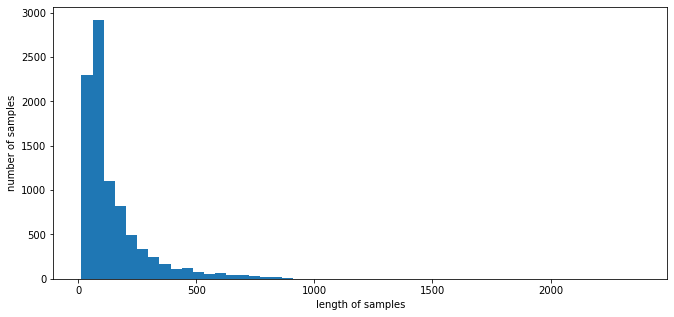

In [105]:
print('훈련용 뉴스의 최대 길이: {}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이: {}'.format(sum(map(len, x_train))//len(x_train)))

plt.hist([len(s) for s in x_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 길이가 가장 긴 뉴스의 길이는 2,376
- 평균 길이는 145
- 아무래도 길이가 가장 긴 뉴스의 길이가 다르 뉴스에 비해 유독 긴 편인 것 같음
- 시각화된 그래프의 분포로 봤을 때 500 ~ 1,000 사이의 길이를 가지는 뉴스도 일부 있어 보임
<br>

- 우리가 맞춰야 하는 클래스의 분포 확인해보기
- 모델의 성능에 영향을 줄 수 있는 요소이기 때문에 실제로 모든 클래스가 다 존재는 하는 것인지, 또 어떤 클래스가 유독 많은지와 같은 것들을 사전에 확인해 보기

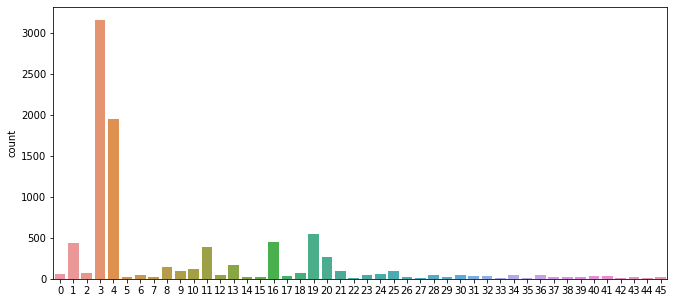

In [106]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(11, 5)
sns.countplot(x = y_train)
plt.show()

- 뉴스 데이터는 3번, 4번 클래스가 대부분을 차지하고 있음
- 그 뒤로는 19번, 16번, 1번, 11번 등이 높은 분포를 가지고 있음
- 시각화를 통해 어떤 클래스가 많고, 적은 것을 쉽게 확인할 수는 있었지만 수치적으로 정확히 몇 개인지도 출력해보겠음

In [107]:
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


- 3번, 4번 클래스의 경우에는 각각 3,159개와 1,949개가 존재
- 그 뒤로는 549개로 19번 클래스가 세 번째로 많고, 16번 클래스가 444개로 4번째로 많음
- 이렇게 각 클래스가 몇 개가 존재하는지도 확인해 봤음

### 3-2. 데이터 복원하기

#### 원본 뉴스 데이터로 복원해보기
- 조금은 일반적이지 않은 전처리 해보기
- 이 데이터는 어느 정도 전처리가 되어서 각 단어가 정수 시퀀스로 변환된 채 제공되고 있음
- 하지만 일반적인 상황이라면 텍스트를 숫자로 수치화하는 과정을 처음부터 해야 함
<br>

- 그래서 여기서 정수 시퀀스로 변환된 데이터를 '굳이' 다시 텍스트로 돌려보기
<br>

- 아래와 같이 로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공
- 이를 'word_index'로 저장해보겠음

In [108]:
word_index = reuters.get_word_index(path = "reuters_word_index.json")

- 이게 이 데이터의 단어장(Vocabulary)
- 이제 'word_index' 안에 단어를 입력하면 이 단어가 어떤 정수와 맵핑이 되는지를알 수 있음
- 단어 'the'는 어떤 정수와 맵핑이 될까?

In [109]:
word_index["the"]

1

- 단어 'the'는 정수 1과 맵핑이 됨
- 그렇다면 단어 'it'은 어떤 정수와 맵핑이 될까?

In [110]:
word_index["it"]

13

- 단어 'it'은 정수 13과 맵핑이 됨
<br>

- 해야 할 일은 현재 갖고 있는 정수 시퀀스로 되어 있는 데이터를 텍스트 형태로 되돌려야 하는 일
- 사실 'word_index' 보다는 정수로부터 단어를 얻을 수 있는 'index_word'가 필요
<br>

- 그런데 이 데이터에는 **숨겨진 비밀**이 있음
- 뉴스 데이터 안에서 단어 'the'는 사실 1번이 아니라 4번 단어
- 그리고 단어 'it'은 사실 13번 단어가 아니라 16번 단어
- 다른 단어들도 마찬가지로 word_index에 입력으로 했을 때, 얻는 숫자보다는 **+3**을 한 숫자가 원래 고유한 숫자
- 이건 로이터 뉴스 데이터가 정의한 일종의 약속
<br>

- 'reuters.get_word_index'에는 실제 단어에 맵핑한 정수에 -3을 한 정수를 입력해 놓았음
- 그렇기 때문에 'word_index'에서' index_word'를 만들 때 각 정수에 +3을 해주어야 함

In [111]:
index_to_word = {index + 3: word for word, index in word_index.items()}

- 숫자 4와 16을 넣어서 the와 it이 출력되는지 확인해보기

In [112]:
print(index_to_word[4])
print(index_to_word[16])

the
it


- 이 데이터를 위해 약속된 내용은 더 있음
- 0번, 1번, 2번은 사실 각각 '\<pad\>', '\<sos\>', '\<unk\>'라는 자연어 처리를 위한 특별한 토큰들을 위해 맵핑된 번호
- 그래서 만들어진 'index_to_word'에 추가적으로 이 작업을 해주어야 진짜 'index_to_word'가 완성됨

In [113]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

- 'index_to_word'를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원

In [114]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


- 첫 번째 훈련용 뉴스 기사가 정수 시퀀스에서 텍스트로 복원되었음
- 이 데이터도 어느 정도 전처리가 된 상태라서, 자연스럽게 읽히지는 않음
- 하지만 문맥을 가진 텍스트이기 때문에, 이 데이터를 가지고 머신러닝을 시작해도 별 무리는 없어 보임
<br>

- 복원된 첫 번째 훈련용 뉴스 기사에 특별 토큰인 '\<sos\>'와 '\<unk\>'가 보이는데, '\<sos\>'는 텍스트 분류를 위한 토큰이 아니므로 크게 신경을 쓰지 않아도 됨
- 하지만 '\<unk\>'는 자연어 처리 전반에서 쓰이는 특별 토큰이므로 이에 대해서는 이해할 필요가 있음

#### OOV 문제와 UNK 토큰
- 기계가 알고 있는 단어들의 집합을 단어장(Vocabulary)이라고 함
- 기계가 미처 배우지 못한 모르는 단어를 **OOV(Out-Of-Vocabulary) 또는 UNK(Unknow)**이라고 표현
- 어떤 단어를 기계가 모르는 단어로 판단하면, 기계는 해당 단어를 전부 '\<unk\>'라는 일관된 특별 토큰으로 변환
<br>

- 우리가 가장 맨 처음 사용했던 코드를 상기해 보기
```python
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000, test_split = 0.2)
```
- 'num_words = 10000'는 정수 번호가 10,000이 넘는 단어들을 자동으로 '\<unk\>' 토큰으로 처리
- 로이터 뉴스 데이터에서 '\<unk\>'은 정수 2번을 가지도록 약속돼 있으므로 데이터를 로드하는 과정에서 정수 번호가 10,000이 넘는 단어들은 전부 정수 2로 변환되어서 로드가 되었던 것

- 이제 전체 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환해 보기

In [115]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
    
x_train = decoded
print(len(x_train))

8982


In [116]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


- 각각 5개씩 출력해보고, 제대로 변환이 되었는지 확인해보기

In [117]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [118]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

### 3-3. 벡터화 하기
- 앞서 본 텍스트 분류의 과정을 표현한 그림을 다시 보기
![카테고리.png](./images/카테고리.png)
- 텍스트 데이터가 있을 때, 모델의 입력으로 넣기 위해서는 우선 각 문서를 벡터화할 필요가 있음
- 항상 그런 것은 아니지만, 일반적으로 텍스트 분류를 할 모델로 인공 신경망을 사용하는 경우, 벡터화 방법 또한 인공 신경망을 사용하는 것이 보편적
- Word Embedding, Document Embedding, Contextual Embedding 등의 다양한 벡터화 방법이 존재
<br>

- 이번 실습에서는 딥러닝이 아닌 머신러닝 방법을 사용하여 텍스트 분류를 진행할 예정이기 때문에 벡터화 방법도 인공 신경망이 아닌 방법을 사용
- 사용할 벡터화 방법은 Bag of Words 가설을 기반으로 하는 **DTM, TF-IDF** 행렬
<br>

- Bag of Words 가설과 이를 통해 만드는 DTM에 대한 정의는 아래의 링크를 통해 알아보기
- [위키독스: 문서 단어 행렬(DTM)](https://wikidocs.net/24559)

- Document Term Matrix, DTM은 사이킷런의 'CountVectorizer()'을 통해서 생성할 수 있음
- DTM을 생성하고, DTM의 크기 확인해보기

In [119]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


- 훈련용 뉴스의 수가 총 8.982개였기 때문에 DTM의 행의 개수는 8,982개가 됨
- 그런데 이상한 점은 앞에서 데이터를 로드할 때, 'num_words = 10,000'이라는 값을 사용했음에도 DTM 열의 개수는 이보다 현저하게 적은 9,670개밖에 되지 않음
- 그 이유는 DTM이 자체적인 규칙에 따라서 불필요하다고 판단하는 토큰들을 제거하기 때문
<br>

- DTM 행렬을 이어서 TF-IDF 행렬 만들어보기
- TF-IDF 행렬은 퀴즈 4에서 알아본 DTM의 단점을 보정해 주는 효과 가지고 있음
- TF-IDF 행렬에 대한 설명은 아래의 글을 참고
- [위키독스: TF-IDF](https://wikidocs.net/31698)
<br>

- TF-IDF Matrix는 사이킷런의 'TfidfTransformer()'를 통해서 생성할 수 있음
- TF-IDF Matrix는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가짐

In [120]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [121]:
# 테스트 데이터를 DTM으로 변환
x_test_dtm = dtmvector.transform(x_test)

# DTM을 TF-IDF 행렬로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

### 3-4. 다양한 분류 모델 사용해보기

#### (1) 나이브 베이즈 분류기
- 아래 영상을 통해서 나이브베이즈 분류기에 대해 간단히 알아보기
- [나이브 베이즈(Naive Bayes)](https://www.youtube.com/watch?time_continue=3&v=3JWLIV3NaoQ&feature=emb_title)
- 나이브 베이즈 분류기는 사이킷런의 'MultinomialNB()'을 통해 사용할 수 있음
<br>
- 사이킷런이 제공하는 머신러닝 모델들은 공통적으로 'fit()'이라는 함수를 제공
- 훈련 데이터와 해당 훈련 데이터에 대한 레이블을 인자로 사용하면 모델이 이를 학습함

In [122]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = model.predict(tfidfv_test) 

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted),'\n')
print(classification_report(y_test, model.predict(tfidfv_test)))

정확도: 0.6567230632235085 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
 

- 약 66%의 정확도를 얻었음
- 사실 그렇게 좋은 성능은 아님
- 뒤에서 다른 모델들을 통해서 더 좋은 성능을 얻어보기
<br>

- 나이브 베이즈 분류기가 임의의 샘플에 대해서 클래스를 정확히 예측하는지 테스트 해보기
- 네번째 샘플(인덱스 상으로는 3)의 원문을 출력하면 다음과 같음

In [123]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [124]:
y_test[3]

4

- 이 샘플의 레이블은 4
- 과연 모델은 제대로 예측하고 있는지 그리고 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 그래프로 시각화

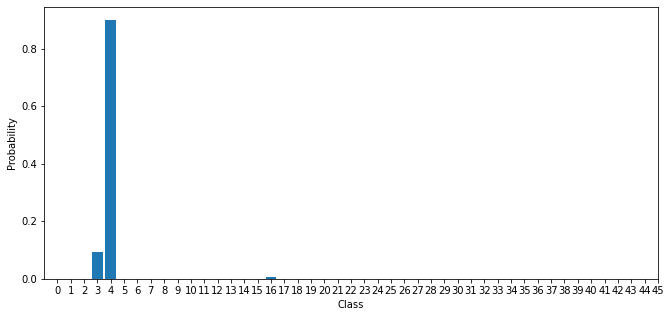

In [125]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11, 5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [126]:
model.predict(tfidfv_test[3])

array([4])

- 모델은 4번 클래스를 약 90%의 확률로 확신
- 10%의 확률로 3번 클래스라고 판단
- 90%의 확률로 확신하므로 모델이 예측한 레이블은 4번
- 해당 샘플은 정확하게 예측했음

#### (2) 컴플리먼트 나이브 베이즈 분류기

- 앞서 사용한 나이브 베이즈 분류기(MultinomialNB)로는 약 66%의 정확도밖에 얻지 못했음
- 사실 클래스의 개수가 46개인 것을 감안해도 그리 좋은 성능은 아님
- 좀 더 좋은 성능을 얻기 위해서 여러 다른 모델들을 시도해 보기

#### Complement Naive Bayes Classifier(CNB)
- 나이브 베이지안 분류기는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있음
- 예를 들어, 많은 샘플(sample)이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있음
- 앞서 로이터 뉴스 데이터에서도 3번, 4번 클래스가 다른 클래스에 비해 상대적으로 많은 클래스를 갖고 있음을 확인했었음
<br>

- 데이터가 불균형할 경우를 대비해 나이브베이즈 분류기를 보완한 것이 **컴플리먼트 나이브 베이즈 분류기**
- 컴플리먼트 나이브 베이즈 분류기는 데이터의 불균형을 고려하여 가중치를 부여하는 특징을 가지고 있음
- 따라서 컴플리먼트 나이브 베이즈 분류기는 나이브베이즈 분류기(MultinomialNB)보다 성능이 일반적으로 더 좋음

In [127]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = cb.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7707034728406055


- 77%의 정확도를 얻었음
- 기존 나이브 베이즈 분류기보다 10% 이상 높은 성능

#### (3). F1-Score
#### Precision, Recall & F1 Score
- 프로젝트에서는 성능 비교를 위한 척도로 **정확도(Accuracy)**를 사용함
- 하지만 Accuracy 외에 또 다른 방법에는 **F1-score**이 있음
<br>

- 아래의 글을 통해서 Precision과 Recall 그리고 F1 score에 대한 설명 읽어보기
- [분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)
- 사이킷런의 'metrics' 패키지에서는 정밀도, 재현율, F1 점수를 구하는 'classification_report()'함수를 제공
- 이 함수는 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1 점수를 각각 구하고 그 평균값으로 전체 모델의 성능을 평가
- 최종 결과에서 각각이 의미하는 바는 다음과 같음
    - 'marco': 단순평균
    - 'weighted': 각 클래스에 속하는 표본의 개수로 가중평균
    - 'accuracy': 정확도. 전체 학습 데이터의 개수에서 클래스를 정확하게 맞춘 개수의 비율

In [128]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

#### (4) Confusion Matrix
- **Confusion Matrix**는 생소한 개념이라기보다는 앞서 f1-score를 이해하기 위해 읽었던 위의 글의 가장 처음에 있던 행렬
- Confusion matrix를 아래의 동영상을 통해 이해해보기
- [머신러닝 - Confusion Matrix(혼동행렬) 알고리즘 및 파이썬 실습](https://www.youtube.com/watch?v=M0GBAzFV9_A&feature=emb_title)
- 지금까지 배운 내용들을 아래의 링크를 통해 간단히 정리
- [Confusion Matrix](https://mjdeeplearning.tistory.com/31)
- 아래 함수를 통해 혼동 행렬(confusion matrix)을 시각화

In [37]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index = classes_name, columns = classes_name)
    fig = plt.figure(figsize = (12, 12))
    heatmap = sns.heatmap(df_cm, annot = True, fmt = "d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = 12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

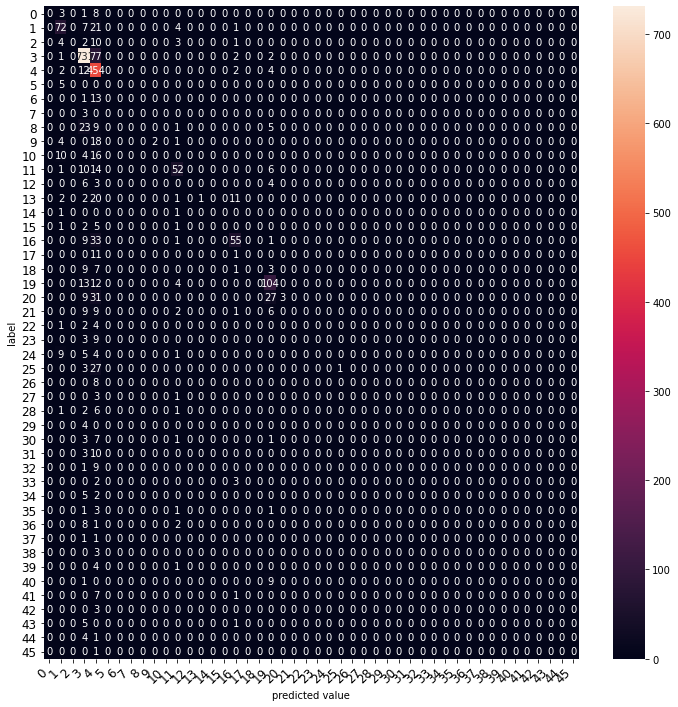

In [38]:
graph_confusion_matrix(model, tfidfv_test, y_test)

#### (5) 로지스틱 회귀(Logistic Regerssion)
- 가장 널리 알려진 2개의 선형 분류 알고리즘인 로지스틱 회귀와 서포트 벡터 머신을 통해서 로이터 뉴스 분류해 보기
<br>

- 로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘을 지원
- 다중 클래스 분류를 위한 로지스틱 회귀를 **소프트맥스 회귀(Softmax Regression)**라고도 함
- 주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다는 점
![소프트맥스.png](./images/소프트맥스.png)
- 소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수
- 예를 들어 위의 그림은 4차원의 벡터를 입력으로 받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정을 보여주고 있음
- 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원이 벡터고, 각 벡터의 차원은 특정 클래스일 확률
- 오차와 실제값의 차일을 줄이는 과정에서 가중치와 편향이 학슴됨
<br>

- 사이킷런에서 소프트맥스 회귀는 'LogisticRegression()'을 통해서 구현할 수 있음

In [129]:
lr = LogisticRegression(C = 10000, penalty = 'l2')
lr.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = lr.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.8076580587711487


- 80%의 정확도를 얻었음
- 지금까지의 모델 중 가장 높은 정확도 얻었음

#### (6) 선형 서포트 벡터 머신
- 서포트 벡터 머신(SVM)은 대표적인 선형 분류 알고리즘
- 아래의 영상을 통해 서포트 벡터 머신에 대해 이해해 보기
-[머신러닝 - SVM](https://www.youtube.com/watch?v=y4CYcpRiNsw)
- 많은 선형 분류 모델은 태생적으로는 이진 분류만을 지원하는 이진 분류 모델(위에서 설명한 로지 로지스틱 회귀는 예외)
- 서포트 벡터 머신의 구현체인 사이킷런의 'LinearSVC' 또한 태생적으로는 이진 분류를 위한 모델
- 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있음
- 바로 일대다(one-vs.-rest 또는 one-vs.-all) 방법
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴
<br>

- 결국 클래스의 수만큼 이진 분류 모델이 만들어짐
- 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
- 서포트 벡터 머신을 사용하여 로이터 뉴스 분류해 보기

In [130]:
lsvc = LinearSVC(C = 1000, penalty = 'l1', max_iter = 500, dual = False)
lsvc.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = lsvc.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7764915405164737


- CNB와 유사하게 77%의 정확도를 얻었음

#### (7) 결정 트리(Decision Tree)
- 결정 트리는 분류와 회귀 문제에 널리 사용하는 모델
- 기본적으로 결정 트른 결정에 다다르기 위해 '예/아니오' 질문을 이어 나가면서 학습
- 이 질문은 스무고개 놀이의 질문과 비슷
- 아래의 영상을 통해 결정 트리에 대해서 이해해 보기
- [머신러닝 - 의사결정트리](https://www.youtube.com/watch?v=n0p0120Gxqk)
<br>

- 사이킷런에서는 'DecisionTreeClassifier()'를 사용해서 결정 트리 구현할 수 있음
- 결정 트리의 깊이는 'max_depth'라는 인자를 통해서 정해줄 수 있음

In [131]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = tree.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6202137132680321


- 지금까지의 모델 중 가장 낮은 정확도인 62%를 얻음
- 사실 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있음
- DTM이나 TF-IDF 행렬의 경우, 고차원이면서 대부분의 값이 0인 희소한 데이터이므로 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근일 수 있음

#### (8) 랜덤 포레스트(Random Forest)
- **앙상블(Ensemble)**이란 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 뒤에서 보팅(Voting)이라는 앙상블 기법을 알아볼텐데, 모델 자체가 앙상블을 사용하는 모델들도 존재
- 랜던 포레스트와 그래디언트 부스팅 트리는 결정 트리를 사용하는 앙상블 모델
<br>

- 랜덤 포레스트에 관한 아래의 영상을 통해서 이해
- [머신러닝 - 랜덤포레스트](https://www.youtube.com/watch?v=nZB37IBCiSA)

In [132]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = forest.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.674087266251113


#### (9) 그래디언트 부스팅 트리(GradientBoostingClassifier)
- 그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델
- 그래디언트 부스팅은 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬
<br>

- 그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있음
- 그리서 보통 랜덤 포레스트를 먼저 사용해보고, 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋음
<br>

- 일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 **메모리도 적게 사용하고 예측도 빠름**
<br>

- 정확도도 준수하고, 특히 예측 속도가 빠르다는 점에서 데이터 경진 대회에서 많은 우승을 했던 모델
- 다만, 훈련 시간의 속도가 좀 오래 걸리고, 트리 기반 모델의 특성으로 인해서 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다는 단점이 있음
<br>

- 사용하는 TF-IDF 행렬은 희소하고 고차원 데이터지만, 결정 트리나 랜덤 포레스트보다 더 높은 성능을 얻을 수 있는지 테스트해 보기
<br>

- 아래 코드 실행에 약 12분 정도 소요되었음
- 'verbose = 3'을 'GradientBoostingClassifier' 안에 인자로 넣어 진행 상황을 확인할 수 있으니 참고

In [133]:
grbt = GradientBoostingClassifier(random_state = 0, verbose = 3)
grbt.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = grbt.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1       13120.6334           15.44m
         2   858177598.4933           15.35m
         3   946802549.6393           15.22m
         4 237936546535516355390923778577443137004998111350751232.0000           15.08m
         5 29932193976389972415457316369798088344148526429337375113230188232847921979331343979616204345474359412007156081620446930232527552512.0000           14.94m
         6 29932193976389972415457316369798088344148526429337375113230188232847921979331343979616204345474359412007156081620446930232527552512.0000           14.80m
         7 29932193976389972415457316369798088344148526429337375113230188232847921979331343979616204345474359412007156081620446930232527552512.0000           14.65m
         8 29932193976389972415457316369798088344148526429337375113230188232847921979331343979616204345474359412007156081620446930232527552512.0000           14.50m
         9 299321939763899724154573163697980883441485264293373751132301

- 76%의 정확도로 결정 트리와 랜덤 포래스트와 비교하여 좋은 성능 얻었음

#### (10) 보팅(Voting)
- 데이터 경진 대회 캐글(Kaggle)에서 상위권을 차지한 많은 솔루션들이 앙상블(Ansemble learning)이라는 방법을 사용
- 그 중에서 투표를 통해 결과를 도출하는 **보팅(Voting)**
- [머신러닝 - 앙상블: 하드보팅, 소프트 보팅](https://www.youtube.com/watch?v=y4Wh0E1d4oE)

In [134]:
voting_classifier = VotingClassifier(estimators = [
    ('lr', LogisticRegression(C = 10000, penalty = 'l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state = 0))
], voting = 'soft', n_jobs = 1)

voting_classifier.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = voting_classifier.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.8116651825467498


#### (11) RNN

In [135]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words=10000, test_split=0.2)
print(len(rnn_x_train), len(rnn_x_test))
max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

8982 2246
max_len :  2376


In [136]:
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [137]:
vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 120

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(120))
model.add(keras.layers.Dense(46, activation='softmax'))

# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 86s 1s/step - loss: 0.4205 - accuracy: 0.1140 - val_loss: 0.0745 - val_accuracy: 0.3260
Epoch 2/50
63/63 [==============================] - 84s 1s/step - loss: 0.0722 - accuracy: 0.3521 - val_loss: 0.0733 - val_accuracy: 0.3260
Epoch 3/50
63/63 [==============================] - 84s 1s/step - loss: 0.0724 - accuracy: 0.3495 - val_loss: 0.0732 - val_accuracy: 0.3260
Epoch 4/50
63/63 [==============================] - 84s 1s/step - loss: 0.0720 - accuracy: 0.3555 - val_loss: 0.0731 - val_accuracy: 0.3260
Epoch 5/50
63/63 [==============================] - 84s 1s/step - loss: 0.0717 - accuracy: 0.3459 - val_loss: 0.0733 - val_accuracy: 0.3260
Epoch 6/50
63/63 [==============================] - 84s 1s/step - loss: 0.0718 - accuracy: 0.3459 - val_loss: 0.0731 - val_accuracy: 0.3260
Epoch 7/50
63/63 [==============================] - 83s 1s/step - loss: 0.0724 - accuracy: 0.3468 - val_loss: 0.0732 - val_accuracy: 0.3260
Epoch 8/50
63/

In [138]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 17s 245ms/step - loss: 0.0720 - accuracy: 0.3620


[0.07199543714523315, 0.36197686195373535]

## 4. 모든 단어 사용하기

```python
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 5000, test_split = 0.2)
```

### 4-1. 데이터 확인하기

In [52]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [53]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

# 데이터 출력
print("\n데이터 출력")
print(x_train[0])
print(x_test[0])

num_classes = max(y_train) + 1

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246

데이터 출력
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47,

### 4-2. 데이터 복원하기

In [54]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
# train 데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
x_train = decoded

# test 데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
x_test = decoded

# 데이터 확인
print(x_train[0])
print(x_test[0])

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the exp

### 4-3. 벡터화

In [55]:
# DTM 생성
dtmvector = CountVectorizer()  

# TF-IDF 생성
tfidf_transformer = TfidfTransformer()  

# train data
x_train_dtm = dtmvector.fit_transform(x_train)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(x_train_dtm.shape)
print(tfidfv.shape)

# test data
# 테스트 데이터를 DTM으로 변환
x_test_dtm = dtmvector.transform(x_test) 
# DTM을 TF-IDF 행렬로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

(8982, 26506)
(8982, 26506)


### 4-4. 다양한 분류 모델 사용해보기

#### (1) 나이브 베이즈 분류기

In [56]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = model.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.5997328584149599


#### (2) 컴플리먼트 나이브 베이즈 분류기

In [57]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = cb.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7649154051647373


#### (3) F1-Score

In [58]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

#### (4) Confusion Matrix

In [59]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index = classes_name, columns = classes_name)
    fig = plt.figure(figsize = (12, 12))
    heatmap = sns.heatmap(df_cm, annot = True, fmt = "d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = 12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

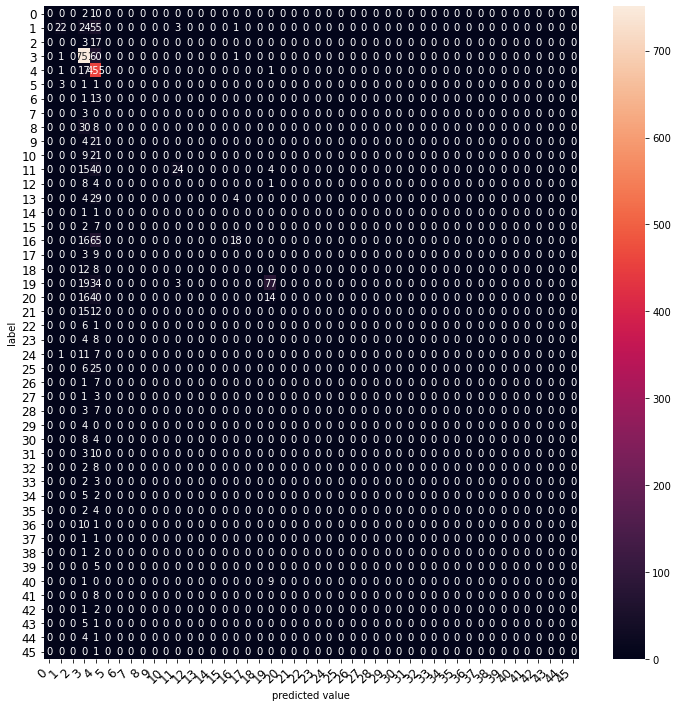

In [60]:
graph_confusion_matrix(model, tfidfv_test, y_test)

#### (5) 로지스틱 회귀(Logistic Regerssion)

In [61]:
lr = LogisticRegression(C = 10000, penalty = 'l2')
lr.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = lr.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.813446126447017


#### (6) 선형 서포트 벡터 머신

In [62]:
lsvc = LinearSVC(C = 1000, penalty = 'l1', max_iter = 500, dual = False)
lsvc.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = lsvc.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7804986642920748


#### (7) 결정 트리(Decision Tree)

In [63]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = tree.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6211041852181657


#### (8) 랜덤 포레스트(Random Forest)

In [64]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = forest.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6544968833481746


#### (9) 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [65]:
grbt = GradientBoostingClassifier(random_state = 0, verbose = 3)
grbt.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = grbt.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1       12845.1851           16.65m
         2   689466281.7264           16.55m
         3 6884613407215.1387           16.38m
         4 5935818824582923550720.0000           16.22m
         5 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000           16.06m
         6 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000           15.90m
         7 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000           15.74m
         8 9040644020576697454476775298309462042959687372080133879675061827235923374847613060426279764553817024942513812241979907601155443654656.0000           15.58m
         9 9040644020576697454476775298309462042959687372080133879675061827235923374847613060

#### (10) 보팅(Voting)

In [66]:
voting_classifier = VotingClassifier(estimators = [
    ('lr', LogisticRegression(C = 10000, penalty = 'l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state = 0))
], voting = 'soft', n_jobs = 1)

voting_classifier.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = voting_classifier.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.8187889581478184


#### (11) RNN

In [81]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words = None, test_split = 0.2)
print(len(rnn_x_train), len(rnn_x_test))
max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

8982 2246
max_len :  2376


In [82]:
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [83]:
vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 120

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(120))
model.add(keras.layers.Dense(46, activation='softmax'))
# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 85s 1s/step - loss: 0.3993 - accuracy: 0.3013 - val_loss: 0.0739 - val_accuracy: 0.3260
Epoch 2/50
63/63 [==============================] - 84s 1s/step - loss: 0.0729 - accuracy: 0.3500 - val_loss: 0.0732 - val_accuracy: 0.3260
Epoch 3/50
63/63 [==============================] - 84s 1s/step - loss: 0.0719 - accuracy: 0.3552 - val_loss: 0.0731 - val_accuracy: 0.3260
Epoch 4/50
63/63 [==============================] - 83s 1s/step - loss: 0.0723 - accuracy: 0.3451 - val_loss: 0.0731 - val_accuracy: 0.3260
Epoch 5/50
63/63 [==============================] - 84s 1s/step - loss: 0.0723 - accuracy: 0.3456 - val_loss: 0.0732 - val_accuracy: 0.3260
Epoch 6/50
63/63 [==============================] - 84s 1s/step - loss: 0.0716 - accuracy: 0.3479 - val_loss: 0.0730 - val_accuracy: 0.3260
Epoch 7/50
63/63 [==============================] - 83s 1s/step - loss: 0.0715 - accuracy: 0.3530 - val_loss: 0.0730 - val_accuracy: 0.3260
Epoch 8/50
63/

In [84]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 17s 244ms/step - loss: 0.0563 - accuracy: 0.5441


[0.056306030601263046, 0.5440783500671387]

## 5. 빈도수 상위 5,000개의 단어만 사용

### 5-1. 데이터 확인하기

In [85]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [86]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

# 데이터 출력
print("\n데이터 출력")
print(x_train[0])
print(x_test[0])

num_classes = max(y_train) + 1

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246

데이터 출력
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 1

### 5-2. 데이터 복원하기

In [87]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
    
# train 데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
x_train = decoded

# test 데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
x_test = decoded

# 데이터 확인
print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program b

### 5-3. 벡터화

In [88]:
# DTM 생성
dtmvector = CountVectorizer()  

# TF-IDF 생성
tfidf_transformer = TfidfTransformer()  

# train data
x_train_dtm = dtmvector.fit_transform(x_train)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(x_train_dtm.shape)
print(tfidfv.shape)

# test data
# 테스트 데이터를 DTM으로 변환
x_test_dtm = dtmvector.transform(x_test) 
# DTM을 TF-IDF 행렬로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

(8982, 4867)
(8982, 4867)


### 5-4. 다양한 분류 모델 사용해보기

#### (1) 나이브 베이즈 분류기

In [89]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = model.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6731967943009796


#### (2) 컴플리먼트 나이브 베이즈 분류기

In [90]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = cb.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7707034728406055


#### (3) F1-Score

In [91]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
          17       0.00    

#### (4) Confusion Matrix

In [92]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index = classes_name, columns = classes_name)
    fig = plt.figure(figsize = (12, 12))
    heatmap = sns.heatmap(df_cm, annot = True, fmt = "d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = 12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

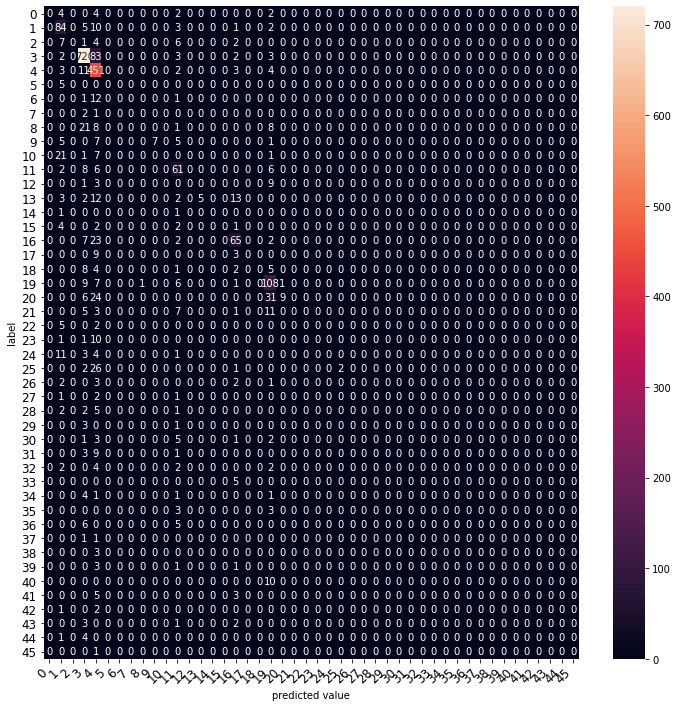

In [93]:
graph_confusion_matrix(model, tfidfv_test, y_test)

#### (5) 로지스틱 회귀(Logistic Regerssion)

In [94]:
lr = LogisticRegression(C = 10000, penalty = 'l2')
lr.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = lr.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.8058771148708815


#### (6) 선형 서포트 벡터 머신

In [95]:
lsvc = LinearSVC(C = 1000, penalty = 'l1', max_iter = 500, dual = False)
lsvc.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = lsvc.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.7658058771148709


#### (7) 결정 트리(Decision Tree)

In [96]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = tree.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.6179875333926982


#### (8) 랜덤 포레스트(Random Forest)

In [97]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = forest.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.701246660730187


#### (9) 그래디언트 부스팅 트리(GradientBoostingClassifier

In [98]:
grbt = GradientBoostingClassifier(random_state = 0, verbose = 3)
grbt.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = grbt.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1       13200.9090           14.81m
         2 19141531432.3860           14.70m
         3 1018136056482137345428864037762575643679300980036667356656533462569269067776.0000           14.58m
         4 5793438208146438552371750463374243580454084126740516228669142075250525372030044080110043136.0000           14.44m
         5 3979630484381169793867261128601856110593550227404752540847489843154493525639763256294740889013872088305157670725524817116093080321688237768704.0000           14.29m
         6 3979630484381169793867261128601856110593550227404752540847489843154493525639763256294740889013872088305157670725524817116093080321688237768704.0000           14.17m
         7 3979630484381169793867261128601856110593550227404752540847489843154493525639763256294740889013872088305157670725524817116093080321688237768704.0000           14.04m
         8 397963048438116979386726112860185611059355022740475254084748984315449352563976325629474088

#### (10) 보팅(Voting)

In [99]:
voting_classifier = VotingClassifier(estimators = [
    ('lr', LogisticRegression(C = 10000, penalty = 'l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state = 0))
], voting = 'soft', n_jobs = 1)

voting_classifier.fit(tfidfv, y_train)

# 테스트 데이터에 대한 예측
predicted = voting_classifier.predict(tfidfv_test)

# 예측값과 실제값 비교
print("정확도:", accuracy_score(y_test, predicted))

정확도: 0.8161175422974176


#### (11) RNN

In [100]:
(rnn_x_train, rnn_y_train), (rnn_x_test, rnn_y_test) = reuters.load_data(num_words=5000, test_split=0.2)
print(len(rnn_x_train), len(rnn_x_test))
max_len = max(len(l) for l in np.concatenate((rnn_x_train, rnn_x_test), axis=0))
print('max_len : ', max_len)

8982 2246
max_len :  2376


In [101]:
rnn_x_train = pad_sequences(rnn_x_train, maxlen=max_len)
rnn_x_test = pad_sequences(rnn_x_test, maxlen=max_len)

rnn_y_train = to_categorical(rnn_y_train, num_classes=46)
rnn_y_test = to_categorical(rnn_y_test, num_classes=46)

rnn_x_train = rnn_x_train[1000:]
rnn_y_train = rnn_y_train[1000:]
rnn_x_val = rnn_x_train[:1000]
rnn_y_val = rnn_y_train[:1000]

In [102]:
vocab_size = len(index_to_word)
print(vocab_size)
word_vector_dim = 120

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(keras.layers.LSTM(120))
model.add(keras.layers.Dense(46, activation='softmax'))
# 모델 훈련
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(rnn_x_train, rnn_y_train, epochs=50, callbacks=[es], batch_size=128, validation_data=(rnn_x_val, rnn_y_val), verbose=1)

30982
Epoch 1/50
63/63 [==============================] - 86s 1s/step - loss: 0.4071 - accuracy: 0.2615 - val_loss: 0.0747 - val_accuracy: 0.3260
Epoch 2/50
63/63 [==============================] - 83s 1s/step - loss: 0.0730 - accuracy: 0.3528 - val_loss: 0.0736 - val_accuracy: 0.3260
Epoch 3/50
63/63 [==============================] - 84s 1s/step - loss: 0.0724 - accuracy: 0.3450 - val_loss: 0.0732 - val_accuracy: 0.3260
Epoch 4/50
63/63 [==============================] - 84s 1s/step - loss: 0.0717 - accuracy: 0.3510 - val_loss: 0.0732 - val_accuracy: 0.3260
Epoch 5/50
63/63 [==============================] - 84s 1s/step - loss: 0.0721 - accuracy: 0.3517 - val_loss: 0.0730 - val_accuracy: 0.3260
Epoch 6/50
63/63 [==============================] - 84s 1s/step - loss: 0.0723 - accuracy: 0.3479 - val_loss: 0.0733 - val_accuracy: 0.3260
Epoch 7/50
63/63 [==============================] - 84s 1s/step - loss: 0.0718 - accuracy: 0.3535 - val_loss: 0.0730 - val_accuracy: 0.3260
Epoch 8/50
63/

In [103]:
model.evaluate(rnn_x_test, rnn_y_test)

71/71 [==============================] - 17s 244ms/step - loss: 0.0720 - accuracy: 0.3620


[0.07198374718427658, 0.36197686195373535]

## 6. 평가하기
- 아래의 기준을 바탕으로 프로젝트를 평가

|평가문항|상세기준|
|---|---|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|3가지 단어 개수에 대해 8가지 머린서닝 기법을 적용하여 그중 최적의 솔루션을 도출하였음|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였음|
|3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였음|

|:model:|:None:|:5000:|:10000:|
|---|---|---|---|
|나이브베이즈 분류기|0.59|0.67|0.65|
|컴플리먼트 나이브 베이즈 분류기|0.76|0.77|0.77|
|F1-score|0.60|0.67|0.66|
|로지스틱 회귀|0.81|0.80|0.80|
|선형 서포트 벡터 머신|0.78|0.76|0.77|
|결정 트리|0.62|0.61|0.62|
|랜덤 포레스트|0.65|0.70|0.67|
|그래디언트 부스팅|트0.77|0.76|0.76|
|보팅|0.81|0.81|0.81|
|RNN|0.54|0.36|0.36|